# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import re
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MariaS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [37]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [38]:
# Fetch the Bitcoin news articles
##bitcoin_articles = newsapi.get_top_headlines(q="Bitcoin", language="en", country="ca")
bitcoin_news_en = newsapi.get_everything(q="Bitcoin AND Canada AND 2022", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about Bitcoin (Canada and 2022): {bitcoin_news_en['totalResults']}")

# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Bitcoin (Canada and 2022): 257


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': None,
 'title': 'A quarter of small businesses across nine countries plan to offer crypto payments -Visa survey - Reuters',
 'description': 'Almost a quarter of small businesses in nine countries around the world plan to accept digital currencies as a form of payment in 2022, while 13% of consumers in those countries expect retail stores to begin offering crypto payments this year and beyond, acco…',
 'url': 'https://www.reuters.com/technology/quarter-small-businesses-across-nine-countries-plan-offer-crypto-payments-visa-2022-01-12/',
 'urlToImage': 'https://www.reuters.com/resizer/OGx0u2JDhwTDbZKkxmRzK3isUaM=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/IFD2SRTZX5IEPPDATWPCFY7TDE.jpg',
 'publishedAt': '2022-01-12T12:02:00Z',
 'content': 'Jan 12 (Reuters) - Almost a quarter of small businesses in nine countries around the world plan to accept digital currencies as a form of payment i

In [39]:
# Fetch the Ethereum news articles
##ethereum_articles = newsapi.get_top_headlines(q="Ethereum", language="en", country="ca")
ethereum_news_en = newsapi.get_everything(q="Ethereum AND Canada AND 2022", language="en", sort_by="relevancy")

# Print total articles
print(f"Total articles about Ethereum (Canada and 2022): {ethereum_news_en['totalResults']}")

# Show sample article
ethereum_news_en["articles"][0]

Total articles about Ethereum (Canada and 2022): 154


{'source': {'id': None, 'name': 'VentureBeat'},
 'author': 'Dean Takahashi',
 'title': 'Dapper Labs: Minting NFTs on Flow takes less energy than a Google Search',
 'description': 'Dapper Labs: Minting NFTs on Flow takes less energy than a Google Search or an Instagram post. Deloitte Canada confirmed that.',
 'url': 'https://venturebeat.com/2022/02/11/dapper-labs-minting-nfts-on-flow-takes-less-energy-than-a-google-search/',
 'urlToImage': 'https://venturebeat.com/wp-content/uploads/2020/08/dapper-NBA-Top-Shot-Press-Brand_Collectibles_.jpg?w=1200&strip=all',
 'publishedAt': '2022-02-11T15:00:00Z',
 'content': 'GamesBeat Summit 2022 returns with its largest event for leaders in gaming on April 26-28th.\xa0Reserve your spot here!\r\nDapper Labs said that minting nonfungible tokens (NFTs) on Flow takes less energy… [+955 chars]'}

In [40]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

#pd.set_option('display.max_colwidth', None)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-01-12,Jan 12 (Reuters) - Almost a quarter of small b...,0.3818,0.071,0.000,0.929
1,2022-02-11,GamesBeat Summit 2022 returns with its largest...,0.0000,0.000,0.000,1.000
2,2022-01-21,Welcome to Kitco News' 2022 outlook series. Th...,0.1531,0.076,0.061,0.863
3,2022-01-21,Canadas main stock index fell on Friday as wea...,-0.7650,0.048,0.199,0.753
4,2022-02-10,A demonstrator screams and bangs gas canisters...,-0.0772,0.088,0.127,0.785


In [41]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-02-11,GamesBeat Summit 2022 returns with its largest...,0.0000,0.000,0.00,1.000
1,2022-01-19,The thing mobility and blockchain technology h...,0.1655,0.052,0.00,0.948
2,2022-01-20,"Twitter Blue, the social media platform’s $2.9...",0.1280,0.045,0.00,0.955
3,2022-02-08,"Three years ago, the U.S. Supreme Court struck...",-0.2500,0.083,0.13,0.787
4,2022-01-27,EarnableFi ($EFI) the coming of age GameFi and...,0.4588,0.083,0.00,0.917


In [42]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.115205,0.066550,0.039200,0.894250
std,0.385279,0.066638,0.057784,0.086265
min,-0.765000,0.000000,0.000000,0.753000
25%,-0.019300,0.000000,0.000000,0.799750
50%,0.076550,0.071000,0.000000,0.921500
75%,0.350450,0.079750,0.066250,0.959500
max,0.778300,0.217000,0.199000,1.000000


In [43]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.184705,0.063400,0.018450,0.91815
std,0.349890,0.067918,0.045118,0.07949
min,-0.440400,0.000000,0.000000,0.78300
25%,0.000000,0.000000,0.000000,0.84675
50%,0.064000,0.053500,0.000000,0.93650
75%,0.483450,0.087500,0.000000,1.00000
max,0.757400,0.217000,0.130000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a mean positive score of 0.0665 whereas ethereum has a mean positive score of 0.0634 which is slightly lower than Bitcoin so it seems the sentiment in the news we analysed is slightly more positive for bitcoin versus ethereum.

Q: Which coin had the highest compound score?

A: Ehtereum had a max compound score of 0.7574 whereas bitcoin's score for this is also higher at 0.7783.

Q. Which coin had the highest positive score?

A: Both coins have the same maximum positive score of 0.217

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [44]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [61]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'said', 'is', 'it', 'you', 'char', 'wa', 'ha'}


In [46]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text one way is to use regex and substitute everything that is NOT a letter
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenied list of the words
    re_words = word_tokenize(re_clean)

    # Lemmatize words into root words
    re_lem = [lemmatizer.lemmatize(word) for word in re_words]
   
    # Convert the words to lowercase
    re_lower = [word.lower() for word in re_lem]
    
    # Remove the stop words
    tokens = [word for word in re_lower if word not in sw.union(sw_addon)]
    
    return tokens


In [47]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-01-12,Jan 12 (Reuters) - Almost a quarter of small b...,0.3818,0.071,0.000,0.929,"[jan, reuters, almost, quarter, small, busines..."
1,2022-02-11,GamesBeat Summit 2022 returns with its largest...,0.0000,0.000,0.000,1.000,"[gamesbeat, summit, return, largest, event, le..."
2,2022-01-21,Welcome to Kitco News' 2022 outlook series. Th...,0.1531,0.076,0.061,0.863,"[welcome, kitco, news, outlook, series, new, y..."
3,2022-01-21,Canadas main stock index fell on Friday as wea...,-0.7650,0.048,0.199,0.753,"[canadas, main, stock, index, fell, friday, we..."
4,2022-02-10,A demonstrator screams and bangs gas canisters...,-0.0772,0.088,0.127,0.785,"[demonstrator, scream, bang, gas, canister, to..."


In [48]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-11,GamesBeat Summit 2022 returns with its largest...,0.0000,0.000,0.00,1.000,"[gamesbeat, summit, return, largest, event, le..."
1,2022-01-19,The thing mobility and blockchain technology h...,0.1655,0.052,0.00,0.948,"[thingmobility, blockchaintechnology, common, ..."
2,2022-01-20,"Twitter Blue, the social media platform’s $2.9...",0.1280,0.045,0.00,0.955,"[twitter, blue, social, medium, platform, usd,..."
3,2022-02-08,"Three years ago, the U.S. Supreme Court struck...",-0.2500,0.083,0.13,0.787,"[three, year, ago, us, supreme, court, struck,..."
4,2022-01-27,EarnableFi ($EFI) the coming of age GameFi and...,0.4588,0.083,0.00,0.917,"[earnablefi, efi, coming, age, gamefi, defi, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams
#from nltk.corpus import reuters

In [50]:
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = Counter(ngrams(processed, n=2))
    bigrams_dict = dict(bigrams)
    ##Future Ref: Use below if you want to return only the 10 most common bigrams. I am returning all here.
        ##top_10 = dict(Counter(ngrams(processed, n=2)).most_common(10))
        ##return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
    ##Future Ref: Use below if you want to return as a dictionart. I am returning as a dataframe for aesthetics.
        ##return bigram_dict
    return pd.DataFrame(list(bigrams_dict.items()), columns=['bigram', 'count'])

In [51]:
# Corpus - created using the list of articles we fetched above about bitcoin into 1 list
bitcoin_df['row_ID'] = range(0, len(bitcoin_df))
ids = bitcoin_df.row_ID
corpus_bitcoin = [bitcoin_df.text[i] for i in ids]

# Generate the Bitcoin N-grams where N=2
bigram_counter(corpus_bitcoin)


,bigram,count
0,"(jan, reuters)",1
1,"(reuters, almost)",1
2,"(almost, quarter)",1
3,"(quarter, small)",1
4,"(small, business)",1
...,...,...
382,"(highyield, accountcrypto)",1
383,"(accountcrypto, holder)",1
384,"(holder, hedge)",1
385,"(hedge, bear)",1


In [52]:
# Generate the Ethereum N-grams where N=2

# Corpus - list of articles we fetched about ethereum into 1 collection
ethereum_df['row_ID'] = range(0, len(ethereum_df))
ids = ethereum_df.row_ID
corpus_ethereum = [ethereum_df.text[i] for i in ids]


# Generate the Ethereum N-grams where N=2
bigram_counter(corpus_ethereum)


,bigram,count
0,"(gamesbeat, summit)",1
1,"(summit, return)",1
2,"(return, largest)",1
3,"(largest, event)",1
4,"(event, leader)",1
...,...,...
348,"(euronext, paris)",1
349,"(paris, amsterdam)",1
350,"(amsterdam, chainlink)",1
351,"(chainlink, terra)",1


In [53]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [54]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(corpus_bitcoin)
tokens_bitcoin = tokenizer(big_string)
token_count(tokens_bitcoin, 10)

[('bitcoin', 8),
 ('around', 5),
 ('year', 4),
 ('digital', 3),
 ('nfts', 3),
 ('friday', 3),
 ('price', 3),
 ('early', 3),
 ('day', 3),
 ('mining', 3)]

In [55]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(corpus_ethereum)
tokens_ethereum = tokenizer(big_string)
token_count(tokens_ethereum, 10)

[('shares', 6),
 ('crypto', 5),
 ('bitcoin', 5),
 ('etps', 5),
 ('largest', 4),
 ('canada', 4),
 ('cryptocurrency', 4),
 ('today', 4),
 ('world', 4),
 ('nfts', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

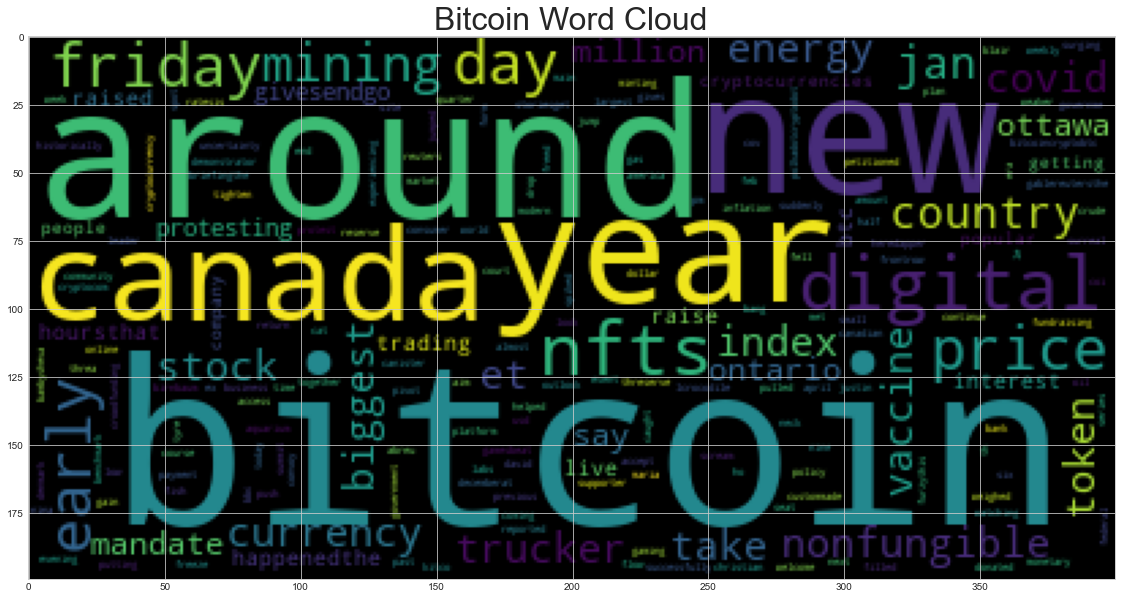

In [69]:
# Generate the Bitcoin word cloud
## make a string from the list of processed text/tokens contained in tokens_bitcoin 
input_text = ' '.join([str(elem) for elem in tokens_bitcoin])
wc = WordCloud().generate(input_text)
plt.title("Bitcoin Word Cloud", fontsize="32")
plt.imshow(wc)

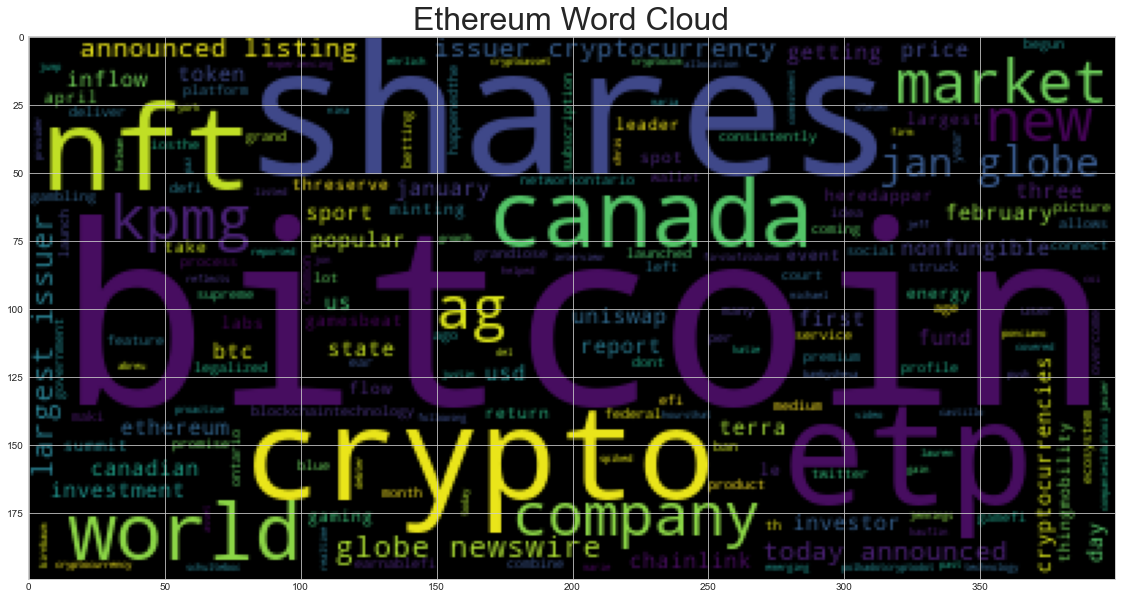

In [71]:
# Generate the Ethereum word cloud
## make a string from the list of processed text/tokens contained in tokens_ethereum 
input_text = ' '.join([str(elem) for elem in tokens_ethereum])
wc = WordCloud().generate(input_text)
##wc = WordCloud().generate(ethereum_df.tokens.to_string())
plt.title("Ethereum Word Cloud", fontsize="32")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [72]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [73]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [74]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = ' '.join(bitcoin_df.text)
#print(bitcoin_big_string)

In [77]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [78]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [79]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])

['Jan 12', 'Reuters', 'nine', '2022', '13%', 'April 26-28th', 'Dapper Labs', 'Flow', "Kitco News'", '2022', 'The new year', 'the Federal Reserve', 'Canadas', 'Friday', 'weekly', 'early December', '11 a.m. ET', 'Ottawa', 'Feb. 10, 2022.BLAIR', 'GABLE/Reuters', 'millions of dollars', 'David L', 'Crocodile', 'six years', 'BBC', 'This Community In Denmark Lives In Surreal C', 'Bitcoin(CRYPTO', 'Friday', '3:30 p.m. ET', 'Bitcoin', 'around $40,600', '11%', 'the previous 24 hours', 'day', 'the Evening Briefing', 'America', 'next week', 'the Bank of Canada', 'today', '6.1%', 'the past 24 hours', 'DOT', '6%', 'Crypto.com', 'Canadian', 'Canadas', '$8.7 million', 'more than half', 'Christian', 'Friday', 'Maria Abreu', 'Nina Bambysheva', 'Justin Birnbaum', 'Lauren Debter', 'Michael del Castillo', 'Steven Ehrlich', 'Chris Helman', 'Katie Jennings', 'Jeff Kauflin', 'Javier Paz', 'Jon Ponciano', 'Marie Schulte-Boc', 'Kevin OLeary', 'BTC-USD', 'OShares Investments', 'Yahoo Finance Live', 'iStock', 'Ge

---

### Ethereum NER

In [80]:
# Concatenate all of the Ethereum text together
ethereum_big_string = ' '.join(ethereum_df.text)
#print(ethereum_big_string)

In [81]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [82]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [83]:
# List all Entities
print([ent.text for ent in ethereum_doc.ents])

['April 26-28th', 'Dapper Labs', 'Flow', 'Canadian', 'Twitter Blue', 'NFT', 'Three years ago', 'the U.S. Supreme Court', 'EarnableFi', 'EFI', 'the coming of age', 'GameFi', '26th', 'January', 'Ethereum', 'Ontario', 'Canada', 'Jan. 27, 2022', 'GLOBE NEWSWIRE', 'Canada', 'today', '6.1%', 'the past 24 hours', 'DOT', '6%', 'Crypto.com', 'Maria Abreu', 'Nina Bambysheva', 'Justin Birnbaum', 'Lauren Debter', 'Michael del Castillo', 'Steven Ehrlich', 'Chris Helman', 'Katie Jennings', 'Jeff Kauflin', 'Javier Paz', 'Jon Ponciano', 'Marie Schulte-Boc', 'New York', 'Jan. 12, 2022', 'GLOBE NEWSWIRE', 'US', 'Canada', 'first', 'KPMG', 'Canada', 'Feb. 7, 2022', 'Canad', 'two', 'Bitcoin and Ethereum', 'Bitcoin', 'Crypto', 'last week', 'above $40,000', '$85 million', 'seven', 'LONDON', 'Jan. 21, 2022', 'GLOBE NEWSWIRE', 'first', 'Kevin OLeary', 'BTC-USD', 'OShares Investments', 'Yahoo Finance Live', 'www.etc-group.com', 'Bitcoin and Ethereum', 'The Motley Fool', 'Visa\xa0', 'NYSE', '2022', '27, 2022', '

---